In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from fashion_mnist.utils.mnist_reader import load_mnist

In [3]:
total_train_image, total_train_labels = load_mnist('./fashion_mnist/data/fashion/', kind='train')
test_image, test_labels = load_mnist('./fashion_mnist/data/fashion/', kind='t10k')

In [4]:
ones_array_train = np.ones((total_train_image.shape[0], 1), dtype=int)
ones_array_test = np.ones((test_image.shape[0], 1), dtype=int)

In [5]:
total_train_image = np.hstack((ones_array_train,total_train_image))
test_image = np.hstack((ones_array_test,test_image))

In [6]:
train_image, validation_image = train_test_split(total_train_image, test_size=0.15, random_state=0)
train_labels, validation_labels = train_test_split(total_train_labels, test_size=0.15, random_state=0)

In [7]:
train_labels_onehot = pd.get_dummies(train_labels)
validation_labels_onehot = pd.get_dummies(validation_labels)
test_labels_onehot = pd.get_dummies(test_labels)

In [8]:
def sigmoid_function(z):
    return 1 / (1 + tf.exp(-z))

def cross_entropy(y, h):
    return tf.reduce_mean(-y * tf.log(h) - (1 - y) * tf.log(1 - h))

In [9]:
lr = 0.000001
batch = train_image.shape[0]
epochs = 200
iterations = int(train_image.shape[0]/batch)
num_classes = 10

In [10]:
#plt.imshow(test_image[4][1:].reshape(28,28))

In [11]:
X = tf.placeholder(tf.float32, shape =([None,28*28+1]))
y = tf.placeholder(tf.float32, shape =([None, 1]))

In [12]:
theta0 = tf.get_variable("theta0", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta1 = tf.get_variable("theta1", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta2 = tf.get_variable("theta2", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta3 = tf.get_variable("theta3", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta4 = tf.get_variable("theta4", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta5 = tf.get_variable("theta5", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta6 = tf.get_variable("theta6", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta7 = tf.get_variable("theta7", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta8 = tf.get_variable("theta8", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
theta9 = tf.get_variable("theta9", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [13]:
gradient0 = tf.get_variable("gradient0", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient1 = tf.get_variable("gradient1", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient2 = tf.get_variable("gradient2", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient3 = tf.get_variable("gradient3", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient4 = tf.get_variable("gradient4", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient5 = tf.get_variable("gradient5", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient6 = tf.get_variable("gradient6", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient7 = tf.get_variable("gradient7", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient8 = tf.get_variable("gradient8", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
gradient9 = tf.get_variable("gradient9", shape=(28*28+1,1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [14]:
z0 = tf.matmul(X,theta0)
z1 = tf.matmul(X,theta1)
z2 = tf.matmul(X,theta2)
z3 = tf.matmul(X,theta3)
z4 = tf.matmul(X,theta4)
z5 = tf.matmul(X,theta5)
z6 = tf.matmul(X,theta6)
z7 = tf.matmul(X,theta7)
z8 = tf.matmul(X,theta8)
z9 = tf.matmul(X,theta9)

In [15]:
h0 = sigmoid_function(z0)
h1 = sigmoid_function(z1)
h2 = sigmoid_function(z2)
h3 = sigmoid_function(z3)
h4 = sigmoid_function(z4)
h5 = sigmoid_function(z5)
h6 = sigmoid_function(z6)
h7 = sigmoid_function(z7)
h8 = sigmoid_function(z8)
h9 = sigmoid_function(z9)

In [16]:
gradient0_update = gradient0.assign(tf.tensordot(tf.transpose(X), tf.subtract(h0, y),1))
gradient1_update = gradient1.assign(tf.tensordot(tf.transpose(X), tf.subtract(h1, y),1))
gradient2_update = gradient2.assign(tf.tensordot(tf.transpose(X), tf.subtract(h2, y),1))
gradient3_update = gradient3.assign(tf.tensordot(tf.transpose(X), tf.subtract(h3, y),1))
gradient4_update = gradient4.assign(tf.tensordot(tf.transpose(X), tf.subtract(h4, y),1))
gradient5_update = gradient5.assign(tf.tensordot(tf.transpose(X), tf.subtract(h5, y),1))
gradient6_update = gradient6.assign(tf.tensordot(tf.transpose(X), tf.subtract(h6, y),1))
gradient7_update = gradient7.assign(tf.tensordot(tf.transpose(X), tf.subtract(h7, y),1))
gradient8_update = gradient8.assign(tf.tensordot(tf.transpose(X), tf.subtract(h8, y),1))
gradient9_update = gradient9.assign(tf.tensordot(tf.transpose(X), tf.subtract(h9, y),1))

In [17]:
theta0_update = theta0.assign(theta0 - lr * gradient0)
theta1_update = theta1.assign(theta1 - lr * gradient1)
theta2_update = theta2.assign(theta2 - lr * gradient2)
theta3_update = theta3.assign(theta3 - lr * gradient3)
theta4_update = theta4.assign(theta4 - lr * gradient4)
theta5_update = theta5.assign(theta5 - lr * gradient5)
theta6_update = theta6.assign(theta6 - lr * gradient6)
theta7_update = theta7.assign(theta7 - lr * gradient7)
theta8_update = theta8.assign(theta8 - lr * gradient8)
theta9_update = theta9.assign(theta9 - lr * gradient9)

In [18]:
loss0 = cross_entropy(y,h0)
loss1 = cross_entropy(y,h1)
loss2 = cross_entropy(y,h2)
loss3 = cross_entropy(y,h3)
loss4 = cross_entropy(y,h4)
loss5 = cross_entropy(y,h5)
loss6 = cross_entropy(y,h6)
loss7 = cross_entropy(y,h7)
loss8 = cross_entropy(y,h8)
loss9 = cross_entropy(y,h9)

In [19]:
tf_X = tf.placeholder(tf.float32)
tf_X_norm = tf.image.per_image_standardization(tf_X)

In [20]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

train_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: train_image})
validation_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: validation_image})
test_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: test_image})

In [21]:
sess.run(tf.global_variables_initializer())

train_epoch_loss_list = []
validation_epoch_loss0_list = []

for i in range(epochs):
    batch_accumulate_loss = 0
    
    print('Epoch {}'.format(i))
    for j in range(iterations):
        index = j*batch


        _,_, train_loss_value0 = sess.run([gradient0_update,theta0_update, cross_entropy(y, h0)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][0][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value1 = sess.run([gradient1_update,theta1_update, cross_entropy(y, h1)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][1][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value2 = sess.run([gradient2_update,theta2_update, cross_entropy(y, h2)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][2][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value3 = sess.run([gradient3_update,theta3_update, cross_entropy(y, h3)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][3][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value4 = sess.run([gradient4_update,theta4_update, cross_entropy(y, h4)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][4][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value5 = sess.run([gradient5_update,theta5_update, cross_entropy(y, h5)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][5][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value6 = sess.run([gradient6_update,theta6_update, cross_entropy(y, h6)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][6][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value7 = sess.run([gradient7_update,theta7_update, cross_entropy(y, h7)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][7][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value8 = sess.run([gradient8_update,theta8_update, cross_entropy(y, h8)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][8][index:index+batch].values.reshape(batch,1)})
        _,_, train_loss_value9 = sess.run([gradient9_update,theta9_update, cross_entropy(y, h9)], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot.iloc[:][9][index:index+batch].values.reshape(batch,1)})

        batch_accumulate_loss += train_loss_value0
        batch_accumulate_loss += train_loss_value1
        batch_accumulate_loss += train_loss_value2
        batch_accumulate_loss += train_loss_value3
        batch_accumulate_loss += train_loss_value4
        batch_accumulate_loss += train_loss_value5
        batch_accumulate_loss += train_loss_value6
        batch_accumulate_loss += train_loss_value7
        batch_accumulate_loss += train_loss_value8
        batch_accumulate_loss += train_loss_value9
        
    train_epoch_loss = batch_accumulate_loss/(iterations*num_classes)
    train_epoch_loss_list.append(train_epoch_loss)
    
    validation_epoch_loss0 = sess.run(cross_entropy(y,h0), feed_dict={X:validation_image_norm, y:validation_labels_onehot.iloc[:][0].values.reshape(-1,1)})
    validation_epoch_loss0_list.append(validation_epoch_loss0)

    print('Training loss {0:.4f}'.format(train_epoch_loss))
    print('Validation loss {0:.4f}'.format(validation_epoch_loss0))

Epoch 0
Train loss 0.8870
Validation loss 1.0446
Epoch 1
Train loss 0.4846
Validation loss 0.5961
Epoch 2
Train loss 0.3369
Validation loss 0.3736
Epoch 3
Train loss 0.2416
Validation loss 0.2076
Epoch 4
Train loss 0.2102
Validation loss 0.1654
Epoch 5
Train loss 0.1991
Validation loss 0.1598
Epoch 6
Train loss 0.1906
Validation loss 0.1553
Epoch 7
Train loss 0.1842
Validation loss 0.1516
Epoch 8
Train loss 0.1784
Validation loss 0.1485
Epoch 9
Train loss 0.1740
Validation loss 0.1459
Epoch 10
Train loss 0.1697
Validation loss 0.1435
Epoch 11
Train loss 0.1663
Validation loss 0.1415
Epoch 12
Train loss 0.1629
Validation loss 0.1397
Epoch 13
Train loss 0.1601
Validation loss 0.1381
Epoch 14
Train loss 0.1573
Validation loss 0.1366
Epoch 15
Train loss 0.1550
Validation loss 0.1353
Epoch 16
Train loss 0.1528
Validation loss 0.1341
Epoch 17
Train loss 0.1508
Validation loss 0.1330
Epoch 18
Train loss 0.1489
Validation loss 0.1320
Epoch 19
Train loss 0.1472
Validation loss 0.1311
Epoch 20
T

Train loss 0.1033
Validation loss 0.1089
Epoch 164
Train loss 0.1032
Validation loss 0.1088
Epoch 165
Train loss 0.1031
Validation loss 0.1088
Epoch 166
Train loss 0.1030
Validation loss 0.1087
Epoch 167
Train loss 0.1030
Validation loss 0.1087
Epoch 168
Train loss 0.1029
Validation loss 0.1086
Epoch 169
Train loss 0.1028
Validation loss 0.1086
Epoch 170
Train loss 0.1027
Validation loss 0.1086
Epoch 171
Train loss 0.1027
Validation loss 0.1085
Epoch 172
Train loss 0.1026
Validation loss 0.1085
Epoch 173
Train loss 0.1025
Validation loss 0.1084
Epoch 174
Train loss 0.1024
Validation loss 0.1084
Epoch 175
Train loss 0.1024
Validation loss 0.1084
Epoch 176
Train loss 0.1023
Validation loss 0.1083
Epoch 177
Train loss 0.1022
Validation loss 0.1083
Epoch 178
Train loss 0.1022
Validation loss 0.1082
Epoch 179
Train loss 0.1021
Validation loss 0.1082
Epoch 180
Train loss 0.1020
Validation loss 0.1082
Epoch 181
Train loss 0.1019
Validation loss 0.1081
Epoch 182
Train loss 0.1019
Validation lo

NameError: name 'validation_epoch_loss_list' is not defined

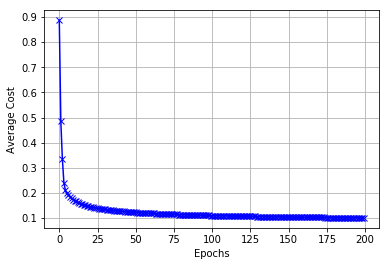

In [22]:
fig = plt.figure(1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.plot(range(len(train_epoch_loss_list)),train_epoch_loss_list, '-bx')
plt.plot(range(len(validation_epoch_loss_list)),validation_epoch_loss_list, '-r')

plt.show()

In [ ]:
h_values0 = sess.run(h0, feed_dict={X:test_image_norm})
h_values1 = sess.run(h1, feed_dict={X:test_image_norm})
h_values2 = sess.run(h2, feed_dict={X:test_image_norm})
h_values3 = sess.run(h3, feed_dict={X:test_image_norm})
h_values4 = sess.run(h4, feed_dict={X:test_image_norm})
h_values5 = sess.run(h5, feed_dict={X:test_image_norm})
h_values6 = sess.run(h6, feed_dict={X:test_image_norm})
h_values7 = sess.run(h7, feed_dict={X:test_image_norm})
h_values8 = sess.run(h8, feed_dict={X:test_image_norm})
h_values9 = sess.run(h9, feed_dict={X:test_image_norm})

In [ ]:
max_values = np.maximum.reduce([h_values0,h_values1,h_values2,h_values3,h_values4,h_values5,h_values6,h_values7,h_values8,h_values9])

In [ ]:
h0_index = h_values0 >= max_values
h1_index = h_values1 >= max_values
h2_index = h_values2 >= max_values
h3_index = h_values3 >= max_values 
h4_index = h_values4 >= max_values
h5_index = h_values5 >= max_values 
h6_index = h_values6 >= max_values
h7_index = h_values7 >= max_values
h8_index = h_values8 >= max_values
h9_index = h_values9 >= max_values 

In [ ]:
result_labels = np.zeros_like(h0_index,dtype=int)

In [ ]:
result_labels[h1_index==1]=1
result_labels[h2_index==1]=2
result_labels[h3_index==1]=3
result_labels[h4_index==1]=4
result_labels[h5_index==1]=5
result_labels[h6_index==1]=6
result_labels[h7_index==1]=7
result_labels[h8_index==1]=8
result_labels[h9_index==1]=9

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test_labels,result_labels.ravel(), average='micro')

In [ ]:
from pandas_ml import ConfusionMatrix

In [ ]:
ConfusionMatrix(test_labels,result_labels.ravel())